添加了17，19号线  
df.drop 删除函数 使用参考https://blog.csdn.net/LHJCSDNYL/article/details/124784943  
df.loc 添加行 https://www.zhihu.com/question/503434324  
不同长度的数组不能直接加入行/列，暂时的解决办法是数组后面加空字符（数组较短），或者dataframe后面加空行/列（数组较长）  

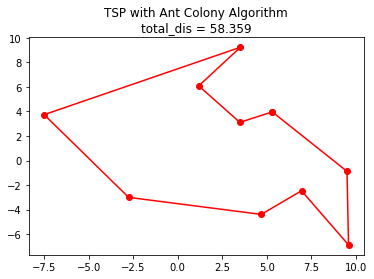

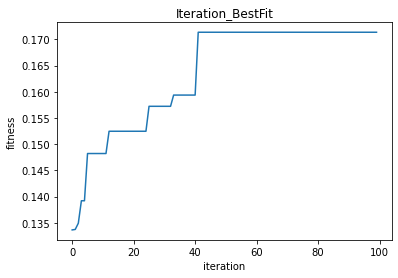

In [15]:
import math
import numpy as np
import matplotlib.pyplot as plt

# 随机生成城市信息

for i in range(nCity):
    for j in range(nCity):
        if i > j:
            dis = ((City[i][0] - City[j][0]) ** 2 + (City[i][1] - City[j][1]) ** 2) ** 0.5
            Dis[(i, j)] = dis
            Dis[(j, i)] = dis

Data_BestFit =[]   #用于保存每一代蚂蚁的最优适应度

#适应度计算函数 适应值= 城市数量 / 路径距离
def Cal_Fit(X):
    total_dis = Dis[(X[-1], X[0])]
    for i in range(nCity - 1):
        total_dis += Dis[(X[i], X[i + 1])]
    return nCity / total_dis

def ACA_TSP():
    nPop = 100        # 种群大小
    Maxit = 100       # 最大迭代次数
    Rou = 1.0         # 蒸发系数
    Rou_damp = 0.95   # 蒸发系数衰减度
    Rou_min = 0.1     # 最小蒸发系数
    alpha = 1         # 信息素重要程度
    beta = 0.2        # 启发式信息重要程度
    epsilon = 1e-5    # 初始信息素浓度
    Phe = {}          # 保存信息素的字典
    for key in Dis.keys():
        Phe[key] = epsilon

    Fit = [0.0 for i in range(nPop)]
    Best_Ant = None
    Best_Fit = -math.inf

    # 迭代求解
    for j in range(Maxit):
        Ant = [[] for i in range(nPop)]
        #蚂蚁寻路
        for i in range(nPop):
            # 以第一个城市为起点，依次从剩下的城市中按照概率挑选目标
            # Open保存已被选取的城市
            # Close保存未被选取的城市
            Open = [0]
            Close = [i for i in range(1,nCity)]
            while Close:
                if len(Close) == 1:
                    Open.append(Close.pop(0))
                else:
                    P = np.zeros([len(Close)])
                    for k in range(len(Close)):
                        P[k] = Phe[(Open[-1], Close[k])] ** alpha + Dis[(Open[-1], Close[k])] ** beta
                    P = P / sum(P)
                    next_index = np.random.choice(range(len(Close)), size=1, p=P)[0]
                    Open.append(Close.pop(next_index))
            Ant[i] = Open.copy()

        #计算每只蚂蚁的路径适应值
        for i in range(nPop):
            Fit[i] = Cal_Fit(Ant[i])
            if Fit[i] > Best_Fit:
                Best_Fit = Fit[i]
                Best_Ant = Ant[i].copy()

        #根据蚂蚁路径更新信息素表
        for i in range(nPop):
            for k in range(nCity-1):
                Phe[(Ant[i][k],Ant[i][k+1])] = Fit[i] + \
                                               (1 - Rou) * Phe[(Ant[i][k],Ant[i][k+1])]
        Rou = max(Rou * Rou_damp ,Rou_min)

        Data_BestFit.append(Best_Fit)

    return Best_Ant, Best_Fit

# 绘制路径与迭代曲线
def Draw_City(City, X ,Best_Fit):
    X = list(X)
    X.append(X[0])
    coor_x = []
    coor_y = []
    for i in X:
        i = int(i)
        coor_x.append(City[i][0])
        coor_y.append(City[i][1])

    plt.plot(coor_x, coor_y, 'r-o')
    plt.title('TSP with Ant Colony Algorithm\n'+'total_dis = '+str(round(Best_Fit,3)))
    plt.show()

    plt.plot(range(len(Data_BestFit)), Data_BestFit)
    plt.title('Iteration_BestFit')
    plt.xlabel('iteration')
    plt.ylabel('fitness')
    plt.show()


if __name__ == '__main__':
    Best_X, Best_Fit = ACA_TSP()
    Draw_City(City, Best_X, (Best_Fit/nCity)**-1)





In [14]:
City

array([[ 5.30785468,  3.96298925],
       [ 1.17807483,  6.08522083],
       [ 4.69130159, -4.39248857],
       [ 9.58997793, -6.8811244 ],
       [-7.49918801,  3.73756751],
       [ 3.48853573,  3.10825224],
       [ 9.50458416, -0.88122516],
       [-2.75675926, -3.00510379],
       [ 3.52125262,  9.23299989],
       [ 6.95015112, -2.46618722]])

In [14]:
print(df.shape[1])
print(df.shape[0]) #等价于len
print(df.shape) #返回df行数，列数的列表
print(len(df))
#有一些我直接写数字了……因为不知道这玩意列数是啥…可以改过来

47
24
(24, 47)
24


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
/private/var/mobile/Containers/Data/Application/C5D60463-1D8D-495D-A792-FFBEBEA9D981/tmp/ipykernel_1906/974196508.py:108: UserWarning: Glyph 27178 (\N{CJK UNIFIED IDEOGRAPH-6A2A}) missing from current font.
  plt.savefig(file_name + ".png", dpi=800)
/private/var/mobile/Containers/Data/Application/C5D60463-1D8D-495D-A792-FFBEBEA9D981/tmp/ipykernel_1906/974196508.py:108: UserWarning: Glyph 22352 (\N{CJK UNIFIED IDEOGRAPH-5750}) missing from current font.
  plt.savefig(file_name + ".png", dpi=800)
/private/var/mobile/Containers/Data/Application/C5D60463-1D8D-495D-A792-FFBEBEA9D981/tmp/ipykernel_1906/974196508.py:108: UserWarning: Glyph 26631 (\N{CJK UNIFIED IDEOGRAPH-6807}) missing from current font.
  plt.savefig(file_name + ".png", dpi=800)
/private/var/mobile/Containers/Data/Application/C5D60463-1D8D-495D-

初始路线： [11, 14, 3, 9, 6, 4, 13, 7, 8, 1, 12, 5, 2, 10]
初始总距离： 56.0122140089359
结束温度为： 0.0009120344560464498
最佳路线： [9, 11, 8, 13, 7, 12, 6, 5, 4, 3, 14, 2, 1, 10]
最佳距离： 29.340520066994227


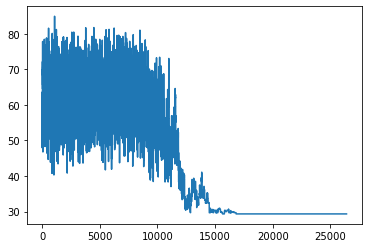

In [38]:
import copy
import math
import random
import matplotlib.pyplot as plt

# 初始温度
T0 = 1000
# 终止温度
Tend = 1e-3
# 个温度下的迭代次数（链长）
L = 200
# 降温速率
q = 0.9
# 各个城市的坐标
X = [(16.4700, 96.1000),
     (16.4700, 94.4400),
     (20.0900, 92.5400),
     (22.3900, 93.3700),
     (25.2300, 97.2400),
     (22.0000, 96.0500),
     (20.4700, 97.0200),
     (17.2000, 96.2900),
     (16.3000, 97.3800),
     (14.0500, 98.1200),
     (16.5300, 97.3800),
     (21.5200, 95.5900),
     (19.4100, 97.1300),
     (20.0900, 92.5500)]


# 构建距离矩阵
def build_distance():
    # 初始化城市距离矩阵
    distance = [[0 for _ in range(len(X))] for _ in range(len(X))]
    # 计算各个城市之间的距离
    for i in range(len(X)):
        pos1 = X[i]
        for j in range(i+1, len(X)):
            pos2 = X[j]
            distance[i][j] = pow((pow(pos1[0] - pos2[0], 2) + pow(pos1[1] - pos2[1], 2)), 0.5)
            distance[j][i] = distance[i][j]
    return distance


# 产生新的路径解
def gen_new_path(path):
    new_path = copy.copy(path)
    # 随机产生两个索引
    idx1 = random.randint(0, len(path) - 1)
    idx2 = random.randint(0, len(path) - 1)
    # 交换路径中的两个城市
    temp = new_path[idx1]
    new_path[idx1] = new_path[idx2]
    new_path[idx2] = temp
    return new_path


# 计算路径总距离
def path_distance(path, distance):
    total_distance = 0.0
    # 循环路径上所有城市进行计算，到最后一个城市返回出发城市
    for i in range(len(path)):
        if i == len(path) - 1:
            total_distance += distance[path[i]][path[0]]
        else:
            total_distance += distance[path[i]][path[i + 1]]
    return total_distance


# Metropolis准则函数
def metropolis(old_path, new_path, distance, t):
    # 路径的能量即路径上各城市距离之和
    # 新路径的能量函数和旧路径的能量函数之差
    delta = path_distance(new_path, distance) - path_distance(old_path, distance)
    # 若新路径能量低于旧路径，则接受新路径解
    if delta < 0:
        return copy.copy(new_path), path_distance(new_path, distance)
    # 若新路径能量高于旧路径，则按exp(-delta/t)概率接受新路径解
    if math.exp(-delta/t) >= random.uniform(0, 1):
        return copy.copy(new_path), path_distance(new_path, distance)
    # 不接受新路径解
    return copy.copy(old_path), path_distance(old_path, distance)


# 绘制结果
def draw_result(best, file_name="tsp_sa"):
    # 各个城市的横纵坐标
    x = [pos[0] for pos in X]
    y = [pos[1] for pos in X]
    # 绘图中文设置
    plt.rcParams['font.sans-serif'] = ['SimHei']  # 显示中文标签
    plt.rcParams['axes.unicode_minus'] = False
    # 清空画布
    plt.clf()
    # 绘制箭头
    for i in range(len(X)):
        # 箭头开始坐标
        start = X[best[i]]
        # 箭头结束坐标
        end = X[best[i + 1]] if i < len(best) - 1 else X[best[0]]
        plt.arrow(start[0], start[1], end[0] - start[0], end[1] - start[1], head_width=0.2, lw=1, length_includes_head=True)
    # 绘制城市编号
    for i in range(len(X)):
        plt.text(x[best[i]], y[best[i]], "{}".format((best[i] + 1)), size=15, color="r")
    plt.xlabel(u"横坐标")
    plt.ylabel(u"纵坐标")
    plt.savefig(file_name + ".png", dpi=800)


# 绘制进化过程
def draw_evolution(evolution):
    x = [i for i in range(len(evolution))]
    # 清空画布
    plt.clf()
    plt.plot(x, evolution)
    plt.savefig('tsp_sa_evolution.png', dpi=800)


# 模拟退火算法
def simulated_annealing():
    # 城市距离矩阵
    distance = build_distance()
    # 城市个数
    city_cnt = len(distance)
    # 初始化城市路径，这里可以随机生成，也可以跟书中的初始路径保持一致
    # path = random.sample(range(0, city_cnt), city_cnt)
    path = [10, 13, 2, 8, 5, 3, 12, 6, 7, 0, 11, 4, 1, 9]
    # 绘制初始路径
    draw_result(path, "init_path")
    # 初始路线长度
    total_distance = path_distance(path, distance)

    print("初始路线：", [p + 1 for p in path])
    print("初始总距离：", total_distance)
    # 温度
    t = T0
    # 进化过程，每一次迭代的路径总距离
    evolution = []
    # 循环直到冷却后停止
    while t > Tend:
        for _ in range(L):
            # 产生新路径
            new_path = gen_new_path(path)
            # 更新最佳路径及对应的距离
            path, total_distance = metropolis(path, new_path, distance, t)
            # 更新进化过程
            evolution.append(total_distance)
        # 降温
        t = t * q
    # 打印退火后信息
    print("结束温度为：", t)
    print("最佳路线：", [p + 1 for p in path])
    print("最佳距离：", total_distance)
    # 绘制最佳路径
    draw_result(path, "tsp_sa_best")
    # 绘制进化过程
    draw_evolution(evolution)


if __name__ == "__main__":
    simulated_annealing()




原文https://blog.csdn.net/weixin_37522117/article/details/125149593?spm=1001.2101.3001.6650.3&utm_medium=distribute.pc_relevant.none-task-blog-2%7Edefault%7EESLANDING%7Edefault-3-125149593-blog-109305769.pc_relevant_landingrelevant&depth_1-utm_source=distribute.pc_relevant.none-task-blog-2%7Edefault%7EESLANDING%7Edefault-3-125149593-blog-109305769.pc_relevant_landingrelevant

In [ ]:
a = [1,2,3,7,-1,-4,-3]
for i in range(0,len(a)):
    sum = s[i]
    for j in range(i,len(a)):
        

In [3]:
distance= [[0, 2, 7, 1, 3, 6, 9, 5, 11, 10, 13],
 [2, 0, 5, 3, 1, 4, 7, 3, 9, 8, 11],
 [7, 5, 0, 7, 4, 1, 2, 6, 4, 3, 6],
 [1, 3, 7, 0, 4, 7, 9, 6, 11, 10, 13],
 [3, 1, 4, 4, 0, 3, 6, 2, 8, 7, 10],
 [6, 4, 1, 7, 3, 0, 3, 5, 5, 4, 7],
 [9, 7, 2, 9, 6, 3, 0, 8, 2, 1, 4],
 [5, 3, 6, 6, 2, 5, 8, 0, 7, 8, 9],
 [11, 9, 4, 11, 8, 5, 2, 7, 0, 1, 2],
 [10, 8, 3, 10, 7, 4, 1, 8, 1, 0, 3],
 [13, 11, 6, 13, 10, 7, 4, 9, 2, 3, 0]]

In [1]:
import random
distance = [[random.randint(1,10) for i in range(400)]for j in range(400)]
distance

[[1,
  2,
  5,
  4,
  7,
  10,
  9,
  5,
  7,
  5,
  6,
  4,
  6,
  7,
  7,
  10,
  4,
  7,
  7,
  5,
  7,
  5,
  7,
  4,
  6,
  3,
  9,
  6,
  2,
  9,
  5,
  2,
  4,
  2,
  3,
  4,
  8,
  7,
  6,
  4,
  1,
  8,
  6,
  2,
  7,
  5,
  8,
  5,
  4,
  9,
  3,
  4,
  6,
  8,
  4,
  5,
  1,
  4,
  9,
  3,
  9,
  8,
  2,
  8,
  1,
  4,
  9,
  7,
  8,
  9,
  7,
  8,
  6,
  8,
  5,
  5,
  7,
  3,
  9,
  2,
  6,
  10,
  2,
  5,
  3,
  3,
  2,
  6,
  8,
  1,
  7,
  1,
  10,
  7,
  5,
  6,
  2,
  2,
  1,
  8,
  7,
  6,
  10,
  5,
  1,
  4,
  1,
  3,
  9,
  9,
  9,
  2,
  10,
  4,
  9,
  7,
  6,
  6,
  4,
  1,
  6,
  8,
  4,
  9,
  5,
  5,
  3,
  3,
  5,
  5,
  8,
  6,
  4,
  7,
  10,
  8,
  3,
  1,
  10,
  2,
  10,
  9,
  8,
  7,
  8,
  2,
  3,
  3,
  2,
  1,
  9,
  6,
  7,
  5,
  3,
  5,
  9,
  1,
  7,
  3,
  2,
  2,
  2,
  1,
  7,
  4,
  5,
  1,
  5,
  8,
  10,
  6,
  1,
  1,
  5,
  7,
  3,
  6,
  1,
  9,
  3,
  6,
  7,
  7,
  1,
  5,
  7,
  2,
  9,
  2,
  5,
  8,
  8,
  2,
  8,
  2,
  2,
  1,


In [2]:
import copy
import math
import random
import matplotlib.pyplot as plt

# 初始温度
T0 = 1000
# 终止温度
Tend = 1e-3
# 个温度下的迭代次数（链长）
L = 200
# 降温速率
q = 0.9
#如果是途径必经点（有不必要的点）不是必经的可以不用放进dist矩阵里

#若指定起点终点
lst_s = [2,3]
lst_t = [i for i in range(1,len(distance)+1)]
#del lst_t[lst_s[0] - 1]
#del lst_t[lst_s[1] - 2]
lst_t.remove(len(distance))
lst_t.remove(1)
# 产生新的路径解
result = set()
def gen_new_path(path):
    new_path = copy.copy(path)
    # 随机产生两个索引
    idx1 = random.sample(lst_t,1)[0] -1
    idx2 = random.sample(lst_t,1)[0] -1
    # 交换路径中的两个城市
    temp = new_path[idx1]
    new_path[idx1] = new_path[idx2]
    new_path[idx2] = temp
    return new_path


# 计算路径总距离
def path_distance(path, distance):
    total_distance = 0.0
    # 循环路径上所有城市进行计算，到最后一个城市返回出发城市
    for i in range(len(path) -1):
        
            total_distance += distance[path[i]-1][path[i + 1]-1]
    return total_distance


# Metropolis准则函数
def metropolis(old_path, new_path, distance, t):
    # 路径的能量即路径上各城市距离之和
    # 新路径的能量函数和旧路径的能量函数之差
    delta = path_distance(new_path, distance) - path_distance(old_path, distance)
    # 若新路径能量低于旧路径，则接受新路径解
    if delta < 0:
        return copy.copy(new_path), path_distance(new_path, distance)
    # 若新路径能量高于旧路径，则按exp(-delta/t)概率接受新路径解
    if math.exp(-delta/t) >= random.uniform(0, 1):
        return copy.copy(new_path), path_distance(new_path, distance)
    # 不接受新路径解
    return copy.copy(old_path), path_distance(old_path, distance)



# 绘制进化过程
def draw_evolution(evolution):
    x = [i for i in range(len(evolution))]
    # 清空画布
    plt.clf()
    plt.plot(x, evolution)


# 模拟退火算法
def simulated_annealing():
    # 城市个数
    city_cnt = len(distance)
    # path = random.sample(range(0, city_cnt), city_cnt)
    path = [2,1,11,4,5,6,7,8,9,10,3]

    # 初始路线长度
    total_distance = path_distance(path, distance)
    print("初始路线：", [p for p in path])
    print("初始总距离：", total_distance)
    # 温度
    t = T0
    # 进化过程，每一次迭代的路径总距离
    evolution = []
    # 循环直到冷却后停止
    while t > Tend:
        for _ in range(L):
            # 产生新路径
            new_path = gen_new_path(path)
            # 更新最佳路径及对应的距离
            path, total_distance = metropolis(path, new_path, distance, t)
            # 更新进化过程
            evolution.append(total_distance)
            if total_distance < 27:
                result.add(tuple(new_path))
        # 降温
        t = t * q
    # 打印退火后信息
    print("结束温度为：", t)
    print("最佳路线：", [p for p in path])
    print("最佳距离：", total_distance)
    # 绘制进化过程
    draw_evolution(evolution)


if __name__ == "__main__":
    simulated_annealing()




初始路线： [2, 1, 11, 4, 5, 6, 7, 8, 9, 10, 3]
初始总距离： 52.0


IndexError: list index out of range

In [7]:
len(result)

487

In [3]:
a = set()
a.add(tuple([2,1]))
a

{(2, 1)}

In [24]:
lst_s = [2,3]
lst_t = [i for i in range(1,len(distance)+1)]
del lst_t[lst_s[0] - 1]

del lst_t[lst_s[1] - 2]
random.sample(lst_t,1)[0]


11

In [35]:
random.randint(0,1)

1

初始路线： [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 2

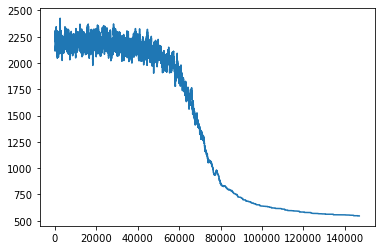

In [3]:
import copy
import math
import random
import time
import matplotlib.pyplot as plt
'''
distance=[[0, 3, 6, 1, 4, 7, 7, 6, 5, 6, 3],
 [3, 0, 5, 2, 1, 4, 7, 3, 6, 7, 4],
 [6, 5, 0, 5, 4, 1, 2, 6, 4, 3, 6],
 [1, 2, 5, 0, 3, 6, 6, 5, 4, 5, 2],
 [4, 1, 4, 3, 0, 3, 6, 2, 7, 7, 5],
 [7, 4, 1, 6, 3, 0, 3, 5, 5, 4, 7],
 [7, 7, 2, 6, 6, 3, 0, 8, 2, 1, 4],
 [6, 3, 6, 5, 2, 5, 8, 0, 7, 8, 7],
 [5, 6, 4, 4, 7, 5, 2, 7, 0, 1, 2],
 [6, 7, 3, 5, 7, 4, 1, 8, 1, 0, 3],
 [3, 4, 6, 2, 5, 7, 4, 7, 2, 3, 0]]
 '''
starttime = time.time()
#初始温度
T0 = 5000
# 终止温度
Tend = 1e-3
#温度下的迭代次数（链长）
L = 250
#降温速率
q = 0.9
res = set() #存储路径
#产生新的路径解
def gen_new_path(path):
    new_path = copy.copy(path)
    idx1 = random.randint(0, len(path) - 1)
    idx2 = random.randint(0, len(path) - 1)
    #随机交换两个城市
    temp = new_path[idx1]
    new_path[idx1] = new_path[idx2]
    new_path[idx2] = temp
    return new_path


#计算路径总距离
def path_distance(path, distance):
    total_distance = 0.0
    for i in range(len(path) - 1):
            total_distance += distance[path[i]-1][path[i + 1]-1]
    return total_distance


# Metropolis准则函数
def metropolis(old_path, new_path, distance, t):
    # 路径的能量即路径上各城市距离之和
    # 新路径的能量函数和旧路径的能量函数之差
    delta = path_distance(new_path, distance) - path_distance(old_path, distance)
    # 若新路径能量低于旧路径，则接受新路径解
    if delta < 0:
        return copy.copy(new_path), path_distance(new_path, distance)
    # 若新路径能量高于旧路径，则按exp(-delta/t)概率接受新路径解
    if math.exp(-delta/t) >= random.uniform(0, 1):
        return copy.copy(new_path), path_distance(new_path, distance)
    # 不接受新路径解
    return copy.copy(old_path), path_distance(old_path, distance)



# 绘制进化过程
def draw_evolution(evolution):
    x = [i for i in range(len(evolution))]
    plt.clf()
    plt.plot(x, evolution)
    plt.savefig('tsp_sa_evolution.png', dpi=800)


# 模拟退火算法
def simulated_annealing():
    city_cnt = len(distance)
    # 初始化城市路径，这里使用0到n的顺序
    # path = random.sample(range(0, city_cnt), city_cnt)
    path = [i for i in range(1,len(distance)+1)]
    # 绘制初始路径

    # 初始路线长度
    total_distance = path_distance(path, distance)
    print("初始路线：", [p for p in path])
    print("初始总距离：", total_distance)
    # 温度
    t = T0
    # 进化过程，每一次迭代的路径总距离
    evolution = []
    # 循环直到冷却后停止
    while t > Tend:
        for _ in range(L):
            # 产生新路径
            new_path = gen_new_path(path)
            # 更新最佳路径及对应的距离
            path, total_distance = metropolis(path, new_path, distance, t)
            # 更新进化过程
            evolution.append(total_distance)
            '''            pp = []
            for i in range(len(path)-1):
                tempp=shortp[path[i]-1][path[i+1]-1]
                for n in range(0,len(tempp)-1):
                    pp.append(tempp[n])
            pp.append(path[len(path)-1])
            if total_distance <= 16:
                res.add(tuple(pp))'''

                
        #降温
        t = t * q
    print(path)
   # print("最佳路线：", [p for p in pp])
    print("最佳距离：", total_distance)
    #迭代过程
    draw_evolution(evolution)


if __name__ == "__main__":
    simulated_annealing()
    endtime= time.time()
    print(endtime-starttime)



In [14]:
res

{(8, 5, 2, 4, 1, 4, 11, 9, 10, 7, 3, 6)}

In [38]:
import copy,random
def gen_new_path(path):
    new_path = copy.copy(path)
    # 随机产生两个索引
    idx1 = random.randint(0, len(path) - 1)
    idx2 = random.randint(0, len(path) - 1)
    # 交换路径中的两个城市
    temp = new_path[idx1]
    new_path[idx1] = new_path[idx2]
    new_path[idx2] = temp
    t = []
    for i in range(len(new_path) - 1):
        t.append(pass_path[new_path[i]-1][new_path[i+1]-1])
    return new_path,t

In [22]:
gen_new_path([7, 3, 6, 5, 2, 4, 1, 8, 11, 9, 10])

[7, 3, 11, 5, 2, 4, 1, 8, 6, 9, 10]

In [6]:
path = [7, 3, 6, 5, 2, 4, 1, 8, 11, 9, 10]
def path_distance(path, distance):
    total_distance = 0.0
    # 循环路径上所有城市进行计算，到最后一个城市返回出发城市
    for i in range(len(path)):
        if i == len(path) - 1:
            total_distance += distance[path[i]-1][path[0]-1]
        else:
            total_distance += distance[path[i]-1][path[i + 1]-1]
        print(total_distance)
    return total_distance
path_distance(path, distance)


2.0
3.0
6.0
7.0
10.0
11.0
16.0
25.0
27.0
28.0
29.0


29.0

In [46]:
len(distance)

11

In [3]:
line19 = ['19号线','新宫站','新发地站','草桥站','牛街站','积水潭站','牡丹园站']
line17 = ['17号线','亦庄站前区南','次渠','次渠北','北神树','朝阳港','十八里店','十里河']
for i in range(40):
    line19.append('')
for i in range(47-len(line17)):
    line17.append('')
print(line19)
print(len(line19))
print(line17,len(line17))

['19号线', '新宫站', '新发地站', '草桥站', '牛街站', '积水潭站', '牡丹园站', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
47
['17号线', '亦庄站前区南', '次渠', '次渠北', '北神树', '朝阳港', '十八里店', '十里河', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''] 47


In [5]:
import csv
import pandas as pd
f = 'subway 2.csv'
df= pd.read_csv(f)
df.loc[21]=line19
df.loc[22]= line17
print(df)

       1号线     苹果园     古城 八角游乐园     八宝山     玉泉路     五棵松    万寿路     公主坟  \
0      2号线     西直门    积水潭  鼓楼大街     安定门     雍和宫     东直门   东四十条     朝阳门   
1   4号线大兴线    安河桥北    北宫门    西苑     圆明园  北京大学东门     中关村   海淀黄庄    人民大学   
2      5号线    天通苑北    天通苑  天通苑南     立水桥    立水桥南    北苑路北   大屯东路  惠新四街北口   
3      6号线   海淀五路居    慈寿寺   花园桥    白石桥南    车公庄西     车公庄    平安里     北海北   
4      7号线    北京西站     湾子   达官营    广安门内     菜市口     虎坊桥    珠市口      桥湾   
5      8号线     朱辛庄    育知路   平西府  回龙观东大街      霍营      育新    西小口     永泰庄   
6    8号线南段     珠市口     天桥  永定门外     木樨园     海户屯    大红门南     和义     东高地   
7      9号线     郭公庄  丰台科技园   科怡路    丰台南路   丰台东大街     七里庄    六里桥    六里桥东   
8     10号线      巴沟    苏州街  海淀黄庄     知春里     知春路     西土城    牡丹园     健德门   
9     13号线     西直门    大钟寺   知春路     五道口      上地     西二旗     龙泽     回龙观   
10  14号线东段     善各庄    来广营   东湖渠      望京      阜通     望京南     将台    东风北桥   
11  14号线西段      西局    七里庄    大井     郭庄子     大瓦窑     园博园    张郭庄     NaN   
12    15号线      俸伯     顺义    石门     南法

然后是新建一个换乘站的表格，遍历一遍，记录每一个小东西出现次数，出现次数大于等于2的保留名字    
value_counts函数不知道能不能用，感觉不是我想要的…  
[索引简介](https://blog.csdn.net/weixin_46713695/article/details/125959391?utm_medium=distribute.pc_relevant.none-task-blog-2~default~baidujs_baidulandingword~default-1-125959391-blog-108586925.pc_relevant_3mothn_strategy_recovery&spm=1001.2101.3001.4242.2&utm_relevant_index=4)  
[df读取csv时是否添加索引](https://blog.csdn.net/bjwhile/article/details/115447060?ops_request_misc=%257B%2522request%255Fid%2522%253A%2522164793529016780255256672%2522%252C%2522scm%2522%253A%252220140713.130102334.pc%255Fall.%2522%257D&request_id=164793529016780255256672&biz_id=0&utm_medium=distribute.pc_search_result.none-task-blog-2~all~first_rank_ecpm_v1~rank_v31_ecpm-2-115447060.142%5Ev3%5Epc_search_insert_es_download,143%5Ev4%5Econtrol&utm_term=dataframe读取文件时修改列索引&spm=1018.2226.3001.4187)  
iloc.[0, 1:]表示写入数据到 除开表头后的第一行，和第一列之后的所有列。

In [2]:
import pandas as pd
import csv
with open('subway 2.csv','r')as file:
    reader = csv.reader(file)
    data = []
    for line in reader:
        data.append(line)
'''
for i in range(24,47):
    data[0][i]=''
print(data)
'''
#救命。。怎么把第一行当成索引行了我的妈呀 空的地方自动添加了unnamed（？）
#把unname换成空字符后…第一行的列index就变成数字了，但是写入csv的时候会进去…
f = 'subway 2.csv'
df= pd.read_csv(f,header = 0)
print(df)

         0       1      2      3       4       5       6      7       8  \
0      1号线     苹果园     古城  八角游乐园     八宝山     玉泉路     五棵松    万寿路     公主坟   
1      2号线     西直门    积水潭   鼓楼大街     安定门     雍和宫     东直门   东四十条     朝阳门   
2   4号线大兴线    安河桥北    北宫门     西苑     圆明园  北京大学东门     中关村   海淀黄庄    人民大学   
3      5号线    天通苑北    天通苑   天通苑南     立水桥    立水桥南    北苑路北   大屯东路  惠新四街北口   
4      6号线   海淀五路居    慈寿寺    花园桥    白石桥南    车公庄西     车公庄    平安里     北海北   
5      7号线    北京西站     湾子    达官营    广安门内     菜市口     虎坊桥    珠市口      桥湾   
6      8号线     朱辛庄    育知路    平西府  回龙观东大街      霍营      育新    西小口     永泰庄   
7    8号线南段     珠市口     天桥   永定门外     木樨园     海户屯    大红门南     和义     东高地   
8      9号线     郭公庄  丰台科技园    科怡路    丰台南路   丰台东大街     七里庄    六里桥    六里桥东   
9     10号线      巴沟    苏州街   海淀黄庄     知春里     知春路     西土城    牡丹园     健德门   
10    13号线     西直门    大钟寺    知春路     五道口      上地     西二旗     龙泽     回龙观   
11  14号线东段     善各庄    来广营    东湖渠      望京      阜通     望京南     将台    东风北桥   
12  14号线西段      西局    七里庄

In [3]:
import numpy as np
arr0 = np.zeros((24,47))
df0 = pd.DataFrame(arr0)
#判断某一站的出现次数
def if_trans(str):
    time = 0
    for n in range(24):
        for i in range(47):
            if df.iat[n,i] == str:
                time += 1
    return time   
for n in range(24):
    for i in range(47):
        name = df.iat[n,i]
        df0.iat[n,i] = if_trans(name)

print(df0)

     0    1    2    3    4    5    6    7    8    9   ...   37   38   39   40  \
0   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  2.0  2.0  ...  0.0  0.0  0.0  0.0   
1   1.0  4.0  1.0  2.0  1.0  2.0  3.0  1.0  2.0  2.0  ...  0.0  0.0  0.0  0.0   
2   1.0  1.0  1.0  2.0  1.0  1.0  1.0  2.0  1.0  1.0  ...  0.0  0.0  0.0  0.0   
3   1.0  1.0  1.0  1.0  2.0  1.0  1.0  1.0  1.0  1.0  ...  0.0  0.0  0.0  0.0   
4   1.0  1.0  2.0  1.0  2.0  1.0  2.0  2.0  1.0  2.0  ...  0.0  0.0  0.0  0.0   
5   1.0  2.0  1.0  1.0  1.0  2.0  1.0  2.0  1.0  2.0  ...  0.0  0.0  0.0  0.0   
6   1.0  2.0  1.0  1.0  1.0  2.0  1.0  1.0  1.0  1.0  ...  0.0  0.0  0.0  0.0   
7   1.0  2.0  1.0  2.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  0.0  0.0  0.0  0.0   
8   1.0  2.0  1.0  1.0  1.0  1.0  2.0  2.0  1.0  2.0  ...  0.0  0.0  0.0  0.0   
9   1.0  3.0  1.0  2.0  1.0  2.0  1.0  1.0  1.0  2.0  ...  2.0  2.0  1.0  2.0   
10  1.0  4.0  1.0  2.0  1.0  1.0  2.0  1.0  1.0  2.0  ...  0.0  0.0  0.0  0.0   
11  1.0  1.0  1.0  1.0  2.0 

In [12]:
num = 0
for a in range(df.shape[0]):
    for b in range(df.shape[1]):
        if df0.iat[a,b] > 1:
            num += 1
            print(df.iat[a,b])
            
print(num)

公主坟
军事博物馆
复兴门
西单
东单
建国门
国贸
大望路
四惠
四惠东
西直门
鼓楼大街
雍和宫
东直门
朝阳门
建国门
崇文门
宣武门
复兴门
车公庄
西直门
西苑
海淀黄庄
国家图书馆
西直门
平安里
西单
宣武门
菜市口
北京南站
角门西
立水桥
雍和宫
东单
崇文门
磁器口
蒲黄榆
宋家庄
慈寿寺
白石桥南
车公庄
平安里
南锣鼓巷
朝阳门
呼家楼
金台路
北京西站
菜市口
珠市口
磁器口
九龙山
朱辛庄
霍营
奥林匹克公园
北土城
鼓楼大街
南锣鼓巷
珠市口
永定门外
郭公庄
七里庄
六里桥
北京西站
军事博物馆
白石桥南
国家图书馆
巴沟
海淀黄庄
知春路
北土城
芍药居
三元桥
呼家楼
国贸
十里河
宋家庄
角门西
西局
六里桥
公主坟
慈寿寺
巴沟
西直门
知春路
西二旗
霍营
立水桥
望京西
芍药居
东直门
望京
金台路
大望路
九龙山
十里河
蒲黄榆
永定门外
北京南站
西局
七里庄
望京
望京西
奥林匹克公园
西苑
四惠
四惠东
朱辛庄
西二旗
阎村东
郭公庄
三元桥
东直门
巴沟
阎村东
宋家庄
次渠
次渠
十里河
118


准备尝试创建邻接矩阵，需要：任一个$a_{ij}$到每一个点的距离  
对于站点名df和times df0 两个的索引是都对应上的。所以可以互相查询  
先写一个判断距离的函数（？）  
input：站点名 output：到附近每一个站点的名字（位置）距离和  
#### 🌻从这里开始：

In [3]:
#因为坐标不一定有一个，所以返回的是坐标列表
def find_index(str):
    list = []
    for x in range(df.shape[0]):
        for y in range(df.shape[1]):
            if df.iat[x,y] == str:
                list.append((x,y)) 
    return list
trans_lst =[]

for x in range(df.shape[0]):
    for y in range(df.shape[1]):
        if df0.iat[x,y] > 1 :
            trans_lst.append(df.iat[x,y])
trans_lst = list(set(trans_lst))
trans_lst.sort()

index_lst = []
for i in range(len(trans_lst)):
    index_lst.append(find_index(trans_lst[i]))

print(trans_lst)


['七里庄', '三元桥', '东单', '东直门', '九龙山', '公主坟', '六里桥', '军事博物馆', '北京南站', '北京西站', '北土城', '十里河', '南锣鼓巷', '呼家楼', '四惠', '四惠东', '国家图书馆', '国贸', '复兴门', '大望路', '奥林匹克公园', '宋家庄', '宣武门', '崇文门', '巴沟', '平安里', '建国门', '慈寿寺', '望京', '望京西', '朝阳门', '朱辛庄', '次渠', '永定门外', '海淀黄庄', '珠市口', '白石桥南', '知春路', '磁器口', '立水桥', '芍药居', '菜市口', '蒲黄榆', '西二旗', '西单', '西局', '西直门', '西苑', '角门西', '车公庄', '郭公庄', '金台路', '阎村东', '雍和宫', '霍营', '鼓楼大街']


In [2]:
import pandas as pd
df0 = pd.read_csv('times.csv',header = 0, index_col = 0)
df = pd.read_csv('subway 2.csv',header = 0)
#第一列是线路名用不到清零
df0.loc[:,'0'] = 0

def dist(a, b):
    left_time = 0
    for i in range(1,b):
        if df0.iat[a,b-i] ==1:
            left_time += 1
        if df0.iat[a,b-i] >1 :
            break
    right_time = 0
    for i in range(b+1,df.shape[1]):
        if df0.iat[a,i] == 1:
            right_time +=1
        if df0.iat[a,i] >1:
            break
        
    return left_time,right_time
site = input()
index = find_index(site)
a = index[0][0]
b = index[0][1]
'''if len(index) > 1:
    print(df.iat[index[1][0],index[1][1]-left_time-1],df.iat[index[1][0],index[1][1]+right_time+1])
'''
    
print(dist(a,b))
print(df.iat[a,b])
left_time,right_time = dist(a,b)

print(df.iat[a,b-left_time-1],df.iat[a,b+right_time+1])

知春路
(1, 3)
知春路
海淀黄庄 北土城


In [ ]:

for i in range(len(index)):
    print(dist(index[i][0],index[i][1]))
    print(df.iat[index[i][0],0])
    left_time,right_time = dist(index[i][0],index[i][1])
    lft = index[i][0]-left_time-1
    rgt = index[i][0]+right_time+1
    print(left_time,right_time)
    print(df.iat[index[i][0],lft],df.iat[index[i][0],rgt])

In [10]:
index_lst

[[(8, 6), (12, 2)],
 [(9, 14), (18, 3)],
 [(0, 17), (3, 17)],
 [(1, 6), (10, 16), (18, 4)],
 [(5, 12), (11, 13)],
 [(0, 8), (9, 40)],
 [(8, 7), (9, 38)],
 [(0, 9), (8, 10)],
 [(2, 21), (11, 21)],
 [(5, 1), (8, 9)],
 [(6, 13), (9, 9)],
 [(9, 24), (11, 16), (23, 7)],
 [(4, 9), (6, 18)],
 [(4, 13), (9, 18)],
 [(0, 22), (15, 1)],
 [(0, 23), (15, 2)],
 [(2, 10), (8, 13)],
 [(0, 20), (9, 20)],
 [(0, 12), (1, 16)],
 [(0, 21), (11, 12)],
 [(6, 11), (13, 17)],
 [(3, 23), (9, 27), (21, 1)],
 [(1, 14), (2, 18)],
 [(1, 11), (3, 18)],
 [(9, 1), (9, 46), (19, 1)],
 [(2, 14), (4, 7)],
 [(0, 18), (1, 9)],
 [(4, 2), (9, 42)],
 [(11, 4), (13, 12)],
 [(10, 12), (13, 13)],
 [(1, 8), (4, 11)],
 [(6, 1), (16, 10)],
 [(21, 13), (23, 2)],
 [(7, 3), (11, 20)],
 [(2, 7), (9, 3)],
 [(5, 7), (7, 1)],
 [(4, 4), (8, 12)],
 [(9, 5), (10, 3)],
 [(3, 19), (5, 9)],
 [(3, 4), (10, 10)],
 [(9, 12), (10, 13)],
 [(2, 19), (5, 5)],
 [(3, 21), (11, 18)],
 [(10, 6), (16, 12)],
 [(0, 13), (2, 17)],
 [(9, 37), (12, 1)],
 [(1, 1

In [13]:
index_lst[1][0][0]

9

In [11]:

for i in range(len(index_lst)):
    for j in range(len(index_lst[i])):
        print(dist(index_lst[i][j][0],index_lst[i][j][1]))

(4, 0)
(0, 5)
(1, 3)
(2, 0)
(3, 0)
(4, 0)
(0, 1)
(2, 0)
(0, 0)
(2, 7)
(0, 2)
(7, 0)
(1, 1)
(0, 1)
(0, 1)
(0, 2)
(0, 1)
(1, 1)
(0, 0)
(0, 3)
(1, 0)
(1, 2)
(3, 2)
(3, 2)
(2, 1)
(4, 0)
(1, 1)
(1, 1)
(1, 0)
(3, 1)
(0, 0)
(0, 0)
(0, 0)
(0, 11)
(2, 1)
(0, 0)
(1, 0)
(1, 3)
(2, 0)
(1, 1)
(0, 0)
(0, 0)
(5, 1)
(3, 3)
(1, 0)
(2, 3)
(0, 11)
(2, 1)
(0, 0)
(1, 2)
(0, 0)
(0, 1)
(3, 0)
(0, 5)
(1, 2)
(0, 1)
(0, 1)
(0, 1)
(1, 1)
(1, 3)
(3, 6)
(11, 0)
(1, 0)
(0, 3)
(1, 0)
(1, 1)
(0, 3)
(9, 1)
(11, 1)
(1, 4)
(1, 9)
(1, 0)
(3, 2)
(1, 1)
(1, 1)
(0, 1)
(1, 1)
(1, 0)
(1, 3)
(1, 2)
(0, 1)
(1, 2)
(3, 7)
(0, 1)
(2, 1)
(0, 2)
(0, 1)
(3, 1)
(1, 1)
(1, 1)
(2, 2)
(1, 0)
(0, 3)
(2, 0)
(5, 0)
(0, 0)
(0, 1)
(0, 0)
(1, 1)
(0, 1)
(2, 3)
(9, 0)
(1, 12)
(3, 5)
(1, 0)
(1, 0)
(0, 4)
(10, 0)
(0, 12)
(6, 0)
(0, 10)
(0, 8)
(1, 0)
(7, 4)
(3, 5)
(2, 0)
(1, 1)
(2, 1)


   
然后做一个查询位置什么的函数…可以输入名称返回所有临近换乘站点距离和名字  
应用到全部…就能写出来邻接矩阵惹， 
呃。。不太知道应该写成什么形式的…先放一下…

In [6]:
import cv2 as cv
image = cv.imread("cat.jpeg")
cv.putText(image,'text',(50,150),cv.FONT_HERSHEY_COMPLEX,1,(0,0,255),2)

array([[[153, 146, 143],
        [157, 150, 147],
        [160, 153, 150],
        ...,
        [131, 126, 125],
        [129, 124, 123],
        [126, 121, 120]],

       [[155, 148, 145],
        [155, 148, 145],
        [157, 150, 147],
        ...,
        [133, 128, 127],
        [131, 126, 125],
        [130, 125, 124]],

       [[158, 151, 148],
        [156, 149, 146],
        [156, 149, 146],
        ...,
        [132, 127, 126],
        [132, 127, 126],
        [132, 127, 126]],

       ...,

       [[ 54,  54,  48],
        [ 47,  47,  41],
        [ 44,  44,  38],
        ...,
        [  2,   5,   3],
        [  4,   7,   5],
        [  8,  11,   9]],

       [[ 52,  52,  46],
        [ 42,  42,  36],
        [ 41,  41,  35],
        ...,
        [  1,   4,   2],
        [  2,   5,   3],
        [  5,   8,   6]],

       [[ 43,  43,  37],
        [ 35,  35,  29],
        [ 39,  39,  33],
        ...,
        [  1,   4,   2],
        [  1,   4,   2],
        [  3,   6,   4]]

In [10]:
import time
import os
import requests
print(time.ctime())
print(os.getcwd())


Fri Oct 28 12:09:18 2022
/private/var/mobile/Containers/Data/Application/C5D60463-1D8D-495D-A792-FFBEBEA9D981/Documents/subway


In [11]:
pip install networkx

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 26.9 kB/s eta 0:00:00

[notice] A new release of pip available: 22.1.2 -> 22.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


### networkx 示例

顶点 v1 到 顶点 v5 的最短加权路径长度:  4


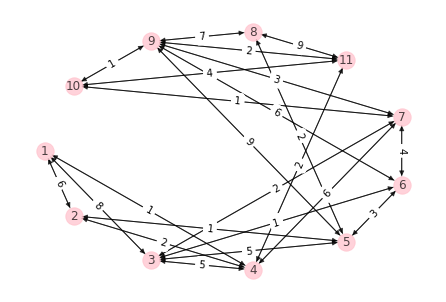

In [3]:
import matplotlib.pyplot as plt
import networkx as nx  
G = nx.Graph()
G.add_weighted_edges_from([(1, 2,6), (1, 3, 8), (1, 4, 1),
                            (2,4,2), (2, 5, 1),
                            (3,4, 5), (3, 5, 5), (3, 6, 1), (3, 7, 2),
                            (4, 7,6),(4,11,2),
                            (5, 6, 3), (5, 8, 2), (5, 9, 9),
                            (6, 7, 4), (6, 9, 6),
                            (7, 9, 3), (7, 10, 1),
                            (8, 9, 7), (8, 11, 9),
                            (9, 10, 1), (9, 11, 2),
                            (10, 11, 4)])# 批量加入赋权边，格式（点1，点2，权值）


# 两个指定顶点之间的最短加权路径
minWPath_v1_v5 = nx.dijkstra_path(G, source=1, target=5)  # 顶点 1 到 顶点 5 的最短加权路径
distance = [[0 for i in range(11)]for j in range(11)]
for i in range(1,12):
    for j in range(1,12):
        distance[j-1][i-1] = nx.dijkstra_path_length(G, source = j, target = i)
# 两个指定顶点之间的最短加权路径的长度
lMinWPath_v1_v5 = nx.dijkstra_path_length(G, source=1, target=5)  # 最短加权路径长度
print("顶点 v1 到 顶点 v5 的最短加权路径长度: ", lMinWPath_v1_v5)
G = nx.DiGraph(G) #构建有向图
layout = nx.shell_layout(G)  #排列节点,保证两次排列方式一样，使第二次绘制权值时在边上
nx.draw(G, layout,node_color = 'pink',with_labels = True,alpha = 0.7)

labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, layout, edge_labels=labels)
plt.savefig('graph.png',dpi = 800)
plt.show()


In [4]:
shortp = [[0 for i in range(11)]for j in range(11)]
for i in range(1,12):
    for j in range(1,12):
        shortp[j-1][i-1] = nx.dijkstra_path(G, source = j, target = i)

In [5]:
shortp

[[[1],
  [1, 4, 2],
  [1, 4, 3],
  [1, 4],
  [1, 4, 2, 5],
  [1, 4, 2, 5, 6],
  [1, 4, 7],
  [1, 4, 2, 5, 8],
  [1, 4, 11, 9],
  [1, 4, 11, 9, 10],
  [1, 4, 11]],
 [[2, 4, 1],
  [2],
  [2, 5, 6, 3],
  [2, 4],
  [2, 5],
  [2, 5, 6],
  [2, 5, 6, 3, 7],
  [2, 5, 8],
  [2, 4, 11, 9],
  [2, 4, 11, 9, 10],
  [2, 4, 11]],
 [[3, 4, 1],
  [3, 6, 5, 2],
  [3],
  [3, 4],
  [3, 6, 5],
  [3, 6],
  [3, 7],
  [3, 6, 5, 8],
  [3, 7, 10, 9],
  [3, 7, 10],
  [3, 7, 10, 9, 11]],
 [[4, 1],
  [4, 2],
  [4, 3],
  [4],
  [4, 2, 5],
  [4, 2, 5, 6],
  [4, 7],
  [4, 2, 5, 8],
  [4, 11, 9],
  [4, 11, 9, 10],
  [4, 11]],
 [[5, 2, 4, 1],
  [5, 2],
  [5, 6, 3],
  [5, 2, 4],
  [5],
  [5, 6],
  [5, 6, 3, 7],
  [5, 8],
  [5, 2, 4, 11, 9],
  [5, 6, 3, 7, 10],
  [5, 2, 4, 11]],
 [[6, 3, 4, 1],
  [6, 5, 2],
  [6, 3],
  [6, 3, 4],
  [6, 5],
  [6],
  [6, 3, 7],
  [6, 5, 8],
  [6, 3, 7, 10, 9],
  [6, 3, 7, 10],
  [6, 3, 7, 10, 9, 11]],
 [[7, 4, 1],
  [7, 3, 6, 5, 2],
  [7, 3],
  [7, 4],
  [7, 3, 6, 5],
  [7, 3, 6],
  [7],
 

In [4]:
pass_path = [[0 for i in range(11)]for j in range(11)]
for i in range(1,12):
    for j in range(1,12):
        pass_path[j-1][i-1] = nx.dijkstra_path(G, source = j, target = i)
pass_path

NameError: name 'G2' is not defined

In [28]:
pass_path
#如果选择了pass_path中i行j列的路线，则增加到经过的点集里
re = []
for i in range(len(pass_path)):
    for j in range(len(pass_path[i])):
        if len(pass_path[i][j]) == 2:
            re.append(pass_path[i][j])
graph = []
temp = []
for j in range(1,12):
    for i in range(len(re)):
        if re[i][0] == j:
            temp.append(re[i][1])

    graph.append(temp)
    temp = []
graph

[[2, 4],
 [1, 5],
 [4, 6, 7],
 [1, 3, 7],
 [2, 6, 8],
 [3, 5],
 [3, 4, 10],
 [5, 9, 11],
 [8, 10, 11],
 [7, 9],
 [8, 9]]

在一个类似上图的带权图中寻找经过所有点的最小路径，其中每条路都是双向的，不同于tsp，不设有每个点只能经过一次和给定起点、终点的限制，但不是任意两点都可以到达    
我想了一下应该可以转化成tsp。不能到达的点就 求个他俩之间的？最短路
>tsp问题：假设有一个旅行商人要拜访n个城市，他必须选择所要走的路径，路径的限制是每个城市只能拜访一次，而且最后要回到原来出发的城市。路径的选择目标是要求得的路径路程为所有路径之中的最小值。

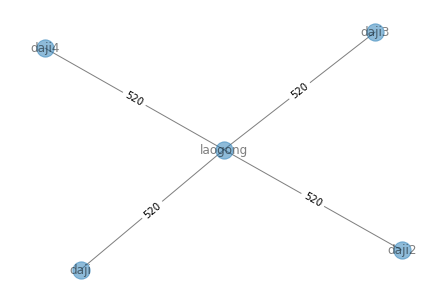

1040


In [8]:
import networkx as nx
from pylab import mpl
import matplotlib.pyplot as plt
G = nx.Graph()
G.add_weighted_edges_from([("daji","laogong",520),
                           ("daji2","laogong",520),("daji3","laogong",520)
                           ,("daji4","laogong",520)])
pos = nx.spring_layout(G) 
nx.draw(G, pos, with_labels=True, alpha=0.5)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()
print(nx.dijkstra_path_length(G, source='daji', target='daji2'))

In [1]:
class Solution:
    def shortestPathLength(self, graph: List[List[int]]) -> int:
        q = collections.deque([])
        visited = set()
        n = len(graph)
        for i in range(n):
            q.append((i, 1 << i))
            visited.add((i, 1 << i))
        dis = 0
        while q:
            dis += 1
            for _ in range(len(q)):
                cur, cur_state = q.popleft()
                for nxt in graph[cur]:
                    nxt_state = cur_state | (1 << nxt)
                    if nxt_state == (1 << n) - 1: return dis
                    if (nxt, nxt_state) not in visited:
                        q.append((nxt, nxt_state))
                        visited.add((nxt, nxt_state))
        return 0

NameError: name 'List' is not defined

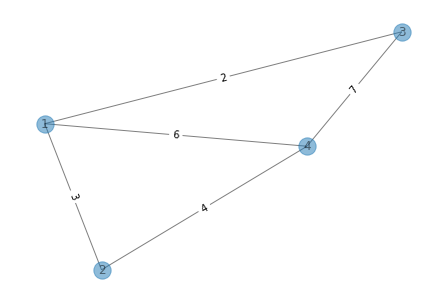

In [2]:
import networkx as nx
from pylab import mpl
import matplotlib.pyplot as plt
G = nx.Graph()
G.add_weighted_edges_from([(1,2,3),
                           (1,3,2),(1,4,6)
                           ,(2,4,4),(3,4,7)])
pos = nx.spring_layout(G) 
nx.draw(G, pos, with_labels=True, alpha=0.5)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()

In [11]:
pip install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 539.0 kB/s eta 0:00:00

[notice] A new release of pip available: 22.1.2 -> 22.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install py2neo

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.0/177.0 kB 435.4 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
